# Exercise: Clustering Algorithms with Scikit Learn
<img src="../Lab/IMG/sk-logo.png" width=200>

* ***SkLearn*** API Reference: https://scikit-learn.org/stable/modules/classes.html
* ***SkLearn*** Clustering Algorithms: https://scikit-learn.org/stable/modules/clustering.html#clustering

In [1]:
#setup env
import time
import warnings
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import cluster, datasets, mixture
from sklearn.neighbors import kneighbors_graph
from sklearn.preprocessing import StandardScaler

In [2]:
#helper calls
n_samples = 1500
random_state = 170
X, y = datasets.make_blobs(n_samples=n_samples, random_state=random_state)
transformation = [[0.6, -0.6], [-0.4, 0.8]]
X_aniso = np.dot(X, transformation)

#generating Data Sets A-F
A = datasets.make_circles(n_samples=n_samples, factor=.5,noise=.05)[0]
B = datasets.make_moons(n_samples=n_samples, noise=.05)[0]
C = datasets.make_blobs(n_samples=n_samples, random_state=8)[0]
D = np.random.rand(n_samples, 2)
E = (X_aniso, y)[0]
F = datasets.make_blobs(n_samples=n_samples,
                             cluster_std=[1.0, 2.5, 0.5],
                             random_state=random_state)[0]

## Exercise 1
Plot all raw data sets A-F in one figure.

Hints: use MATPLOTLIB ```scatter``` plots and ```subfigures```.

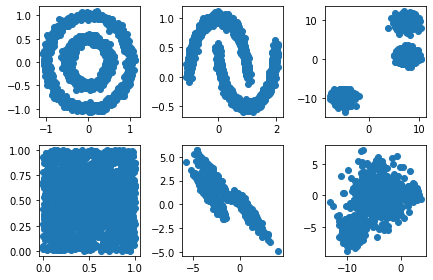

In [3]:
sets = [A,B,C,D,E,F]
for i, data in zip(range(1,7),sets):
    plt.subplot(2,3,i)
    plt.scatter(data[:,0], data[:,1])
plt.tight_layout()

## Exercise 2
Perform ```K-Means``` clustering on all data sets: https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html#sklearn.cluster.KMeans
* 2.1 plot all results
* 2.2 manually try to find the best $k$ for each data set (by visual evaluation)
* 2.3 Use the ```K-Means++``` initialization 

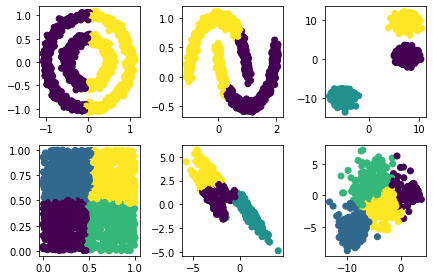

In [4]:
# Method for initialization: ‘k-means++’ (default): 
# selects initial cluster centers for k-mean clustering in a smart way to speed up convergence. 
from sklearn.cluster import KMeans

cluster = [2,2,3,4,3,4]
for i, data, cl in zip(range(1,7),sets,cluster): 
    model = KMeans(n_clusters=cl,  init='k-means++')
    model.fit(data)
    plt.subplot(2,3,i)
    plt.scatter(data[:,0],data[:,1],c=model.labels_)
plt.tight_layout()

## Exercise 3
Performs ```DBSCAN``` clustering on all data sets and plot all results: https://scikit-learn.org/stable/modules/generated/sklearn.cluster.DBSCAN.html#sklearn.cluster.DBSCAN


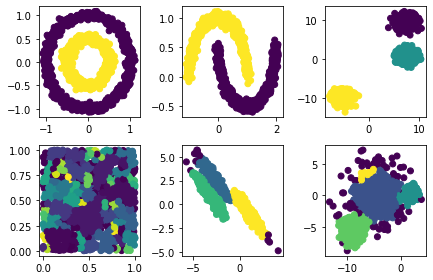

In [5]:
from sklearn.cluster import DBSCAN

eps = [0.2, 0.2, 1.5, 0.03, 0.35, 0.65]
sam = [5, 5, 5, 4, 5, 6]
for i, data, e, sam in zip(range(1,7),sets,eps, sam): 
    model = DBSCAN(eps=e, min_samples=sam, n_jobs=-1)
    model.fit(data)
    plt.subplot(2,3,i)
    plt.scatter(data[:,0],data[:,1],c=model.labels_)
plt.tight_layout()